In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00
Mounted at /content/gdrive


In [5]:
key = '089f8fxxxxxxxxxxxxxxxx41577bfcb'

In [6]:
search_images_bing

<function fastbook.search_images_bing(key, term, min_sz=128, max_images=150)>

In [7]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('contentUrl')
len(ims)

150

In [8]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [9]:
dest = 'images/grizzly.jpg'
download_url(ims[0], dest)

Path('images/grizzly.jpg')

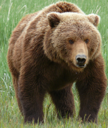

In [10]:
im = Image.open(dest)
im.to_thumb(128,128)

In [11]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [12]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [13]:
fns = get_image_files(path)
fns

(#432) [Path('bears/black/c9b0b093-add0-40ef-afc2-cd4e3c65a944.jpg'),Path('bears/black/40bf20ef-4459-414a-a713-6178e7e39319.jpg'),Path('bears/black/9abcf9ee-8012-4918-9303-4e6c41390b4b.jpg'),Path('bears/black/937d5fe2-4885-4caf-a3dc-60275007dfd4.jpg'),Path('bears/black/c1e017ea-bcc0-4e91-8f3d-f884b35ae4c6.jpg'),Path('bears/black/d6df1640-68d3-4603-96b8-a7f1e513e4d9.jpg'),Path('bears/black/bef7ab05-3269-442b-8fb2-dd0f6ff31c56.jpg'),Path('bears/black/34c49349-6874-4d3d-9530-1576cbdac047.jpg'),Path('bears/black/e6c4bb19-5d83-4ea0-869e-8e9f80799eea.jpg'),Path('bears/black/e4e73108-eaed-4b25-9fd8-464403ea7272.jpg')...]

In [14]:
failed = verify_images(fns)
failed

(#14) [Path('bears/black/756131a0-87a3-4474-84e5-7b438465b09e.jpg'),Path('bears/grizzly/97aff533-e50d-4a31-842f-c9dd760e4006.jpg'),Path('bears/grizzly/66790e5e-a59c-4331-ac9d-0912d9f930d0.jpg'),Path('bears/grizzly/625bffc8-3989-499c-8d0d-f73530f2e512.JPG'),Path('bears/grizzly/5e020e33-8f9f-46f7-81b0-fa4b5c673015.jpg'),Path('bears/teddy/8d30d4e4-3758-4176-9222-2dceff54f31c.jpg'),Path('bears/teddy/b4f59cf6-b213-4035-bc68-00e32fa7d328.jpg'),Path('bears/teddy/8de27403-f16a-4dbb-91c7-e0c60b5973d5.jpg'),Path('bears/teddy/21aeea34-bf94-4ca1-bf37-dbddf9c2d93f.jpg'),Path('bears/teddy/0237c2a4-1d8c-4164-953b-50830a8531f0.jpg')...]

In [15]:
failed.map(Path.unlink);

In [13]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))
dls = bears.dataloaders(path)

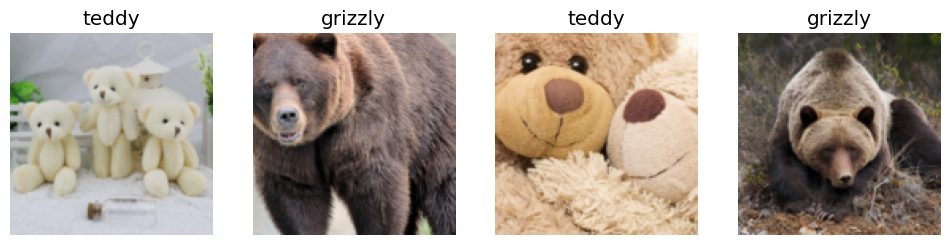

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

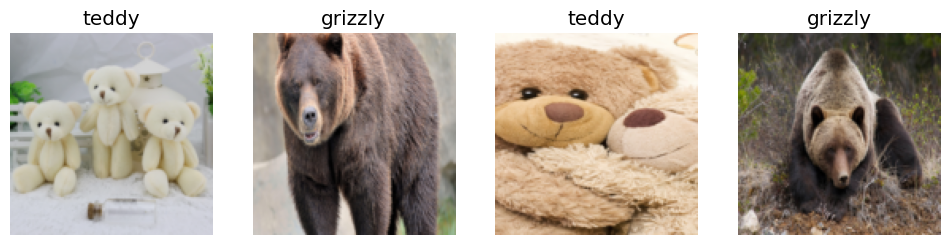

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

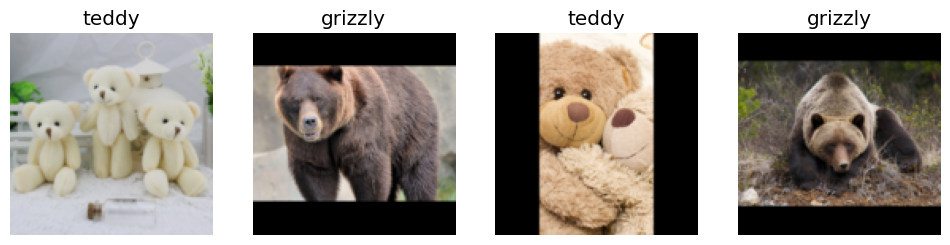

In [ ]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

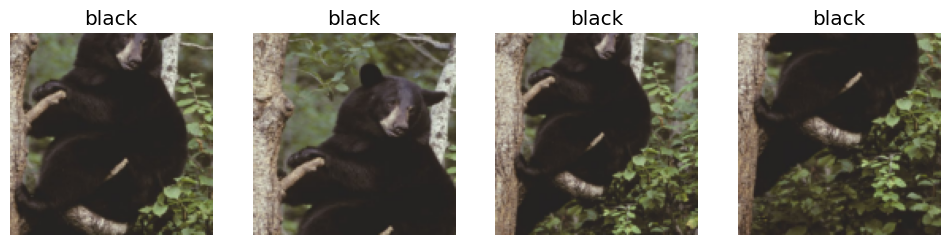

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

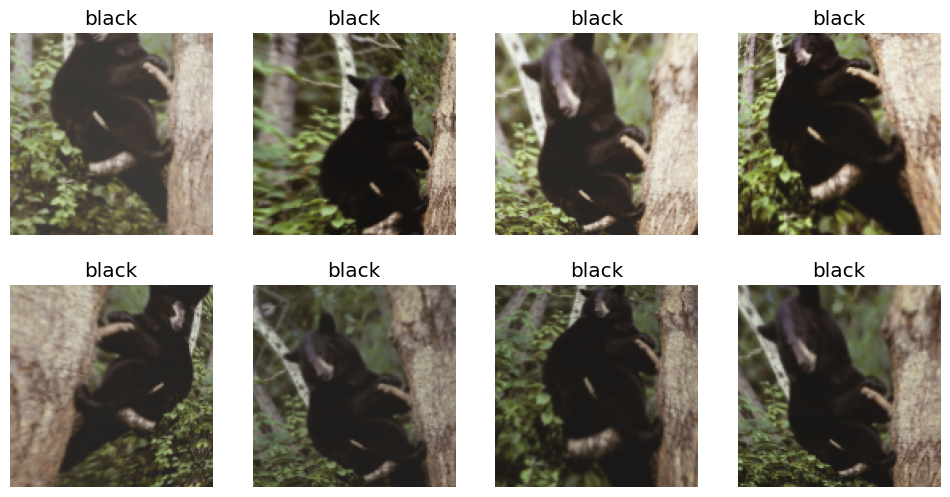

In [ ]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

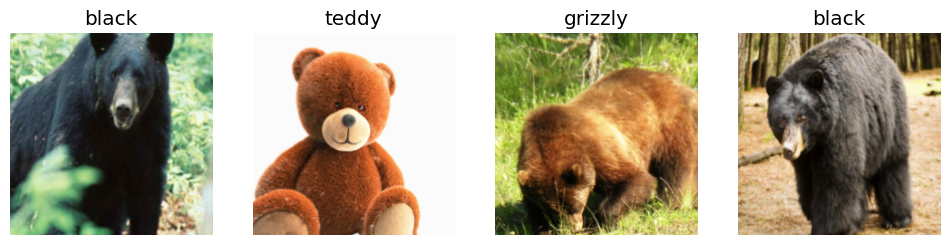

In [14]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows = 1)

In [15]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 93.9MB/s]


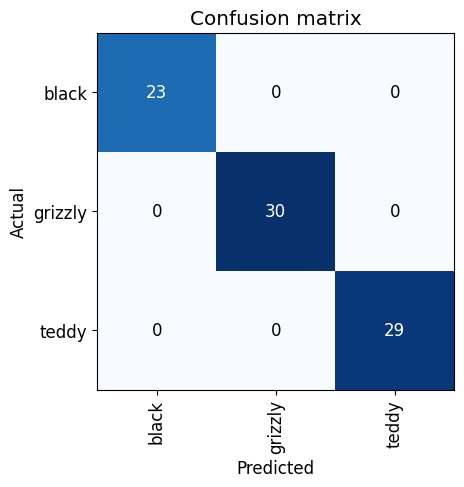

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

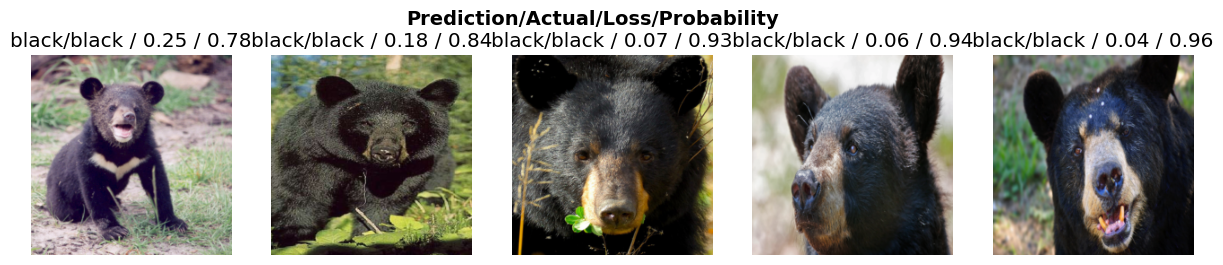

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [16]:
path = Path()
learn.export()

['black', 'grizzly', 'teddy']

In [ ]:
#|default_exp foo

In [89]:
#|export
from fastai.vision.all import *
import gradio as gr

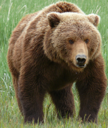

In [68]:
im = PILImage.create('images/grizzly.jpg')
im.thumbnail((128, 128))
im

In [69]:
#|export
learn_inf = load_learner('bears/export.pkl')

In [74]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

In [72]:
learn_inf.predict(im)

('grizzly', tensor(1), tensor([4.4163e-04, 9.9956e-01, 1.6691e-06]))

In [90]:
#|export
lbl_pred = learn_inf.dls.vocab

def classify_image(img):
    img = img.to_thumb(128,128)
    pred,pred_idx,probs = learn_inf.predict(img)
    return dict(zip(lbl_pred, map(float, probs)))

In [91]:
#|export
image = gr.Image(type="pil")
label = gr.Label()
examples = ['images/black.jpg', 'images/grizzly.jpg', 'images/teddy.jpg']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://af8316bb610401f97a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7862 <> https://af8316bb610401f97a.gradio.live


In [94]:
from nbdev.export import nb_export
nb_export('/content/gdrive/MyDrive/Colab Notebooks/Untitled8.ipynb', '.' )